# Scopus Data on SIMR

In [201]:
import pandas as pd 
import requests 
import time 
import matplotlib.pyplot as plt
import re
import collections
from collections import defaultdict

# Explore the scopus.csv file 

In [310]:
scopus = pd.read_csv("scopus.csv", sep = ",", header = 0)
doi = scopus["DOI"] # total of 1792 entries 

# Number of entries without DOI 
doi.isna().sum() # 56, we can go back if we want. 

# Write out first 30 DOI
# doi.to_csv(path = 'doi.txt', header = False, index = False)

doi = doi[-doi.isna()] # Remove empty DOI's

# doi.to_csv(path_or_buf = 'doi.txt', header = None, index = None)
# scopus[(-doi.isna()).index]

# Use Altmetric to find publication metrics using DOIs. 

In [311]:
baseurl = 'https://api.altmetric.com/v1/doi/'
doi_file = 'doi.txt' 

pubs = list()
downloadCounter = 0
badDOI = 0
badEntries = set()
with open(doi_file, "r") as fh:
    for doi in fh:
        doi = doi.strip()
        r = requests.get(baseurl + doi)
        # Sometimes there are bad links, so we keep track of them and move on. 
        if r:
            pubs.append(r.json())
            time.sleep(1)
            print(downloadCounter, pubs[downloadCounter]["title"][:50], doi, r, sep = " | ")
            downloadCounter += 1
        # Sometimes there is one paper with multiple DOI entries. We will track those and not count them in the analysis. 
        else:
            if pubs[downloadCounter - 1]["title"] in badEntries:
                continue
            else:
                badEntries.add(pubs[downloadCounter - 1]["title"])
                print("BAD LINK:", pubs[downloadCounter - 1]["title"][:50], doi, r, sep = " | ")
                # print(badEntries)
                badDOI += 1
            
# example 
# r = requests.get('https://api.altmetric.com/v1/doi/'  + '10.1101/668012 ')
# pubs.append(r.json())
# pubs[30]["tq"]
# https://api.altmetric.com/v1/doi/10.1101/668012 

# print number of bad DOI. It seems like there are many instances of one paper with 2 - 10 different DOI's. 
# To get idea of unique papers with bad DOI's, just divide badDOI by 3. 
badDOI

# print number of good DOI 
downloadCounter

# total downloads 
badDOI + downloadCounter
len(badEntries) + len(pubs)

0 | Structures of autoinhibited and polymerized forms  | 10.1038/s41467-019-10953-z | <Response [200]>
1 | A Hox-TALE regulatory circuit for neural crest pat | 10.1038/s41467-019-09197-8 | <Response [200]>
2 | Topological scoring of protein interaction network | 10.1038/s41467-019-09123-y | <Response [200]>
3 | Hematopoietic stem cells | 10.1097/MOH.0000000000000506 | <Response [200]>
4 | p53 and β-Catenin Expression Predict Poorer Progno | 10.1016/j.clml.2019.03.030 | <Response [200]>
5 | Signatures of Divergence, Invasiveness, and Terres | 10.1093/molbev/msz084 | <Response [200]>
6 | A Role for FACT in RNA Polymerase II Promoter-Prox | 10.1016/j.celrep.2019.05.099 | <Response [200]>
7 | Hypo-osmotic-like stress underlies general cellula | 10.1038/s41586-019-1187-2 | <Response [200]>
8 | Junctional tumor suppressors interact with 14-3-3  | 10.1083/jcb.201803116 | <Response [200]>
9 | Fertility Costs of Meiotic Drivers | 10.1016/j.cub.2019.03.046 | <Response [200]>
10 | Structure and f

74 | Seeing the future of histotechnology through its h | 10.1080/01478885.2018.1527590 | <Response [200]>
75 | B Chromosomes in the Drosophila Genus | 10.3390/genes9100470 | <Response [200]>
BAD LINK: | B Chromosomes in the Drosophila Genus | 10.1097/01.ogx.0000547166.00110.c6 | <Response [404]>
76 | Highly Contiguous Genome Assemblies of 15 Drosophi | 10.1534/g3.118.200160 | <Response [200]>
77 | Antimicrobial peptides modulate long-term memory | 10.1371/journal.pgen.1007440 | <Response [200]>
78 | Rapid Low-Cost Assembly of the Drosophila melanoga | 10.1534/g3.118.200162 | <Response [200]>
79 | An axial Hox code controls tissue segmentation and | 10.1126/science.aar8384 | <Response [200]>
80 | Local Inversion Heterozygosity Alters Recombinatio | 10.1016/j.cub.2018.07.004 | <Response [200]>
81 | PTPN14 regulates Roquin2 stability by tyrosine dep | 10.1080/15384101.2018.1522912 | <Response [200]>
82 | Early adipogenesis contributes to excess fat accum | 10.1016/j.ydbio.2018.06.003 | <

142 | Pronounced strain-specific chemosensory receptor g | 10.1186/s12864-017-4364-4 | <Response [200]>
143 | Single-cell transcriptome analysis of avian neural | 10.7554/eLife.28415 | <Response [200]>
144 | Hoxa1 targets signaling pathways during neural dif | 10.1016/j.ydbio.2017.09.033 | <Response [200]>
BAD LINK: | Hoxa1 targets signaling pathways during neural dif | 10.1016/j.mod.2017.06.004 | <Response [404]>
145 | Age‐associated dysregulation of protein metabolism | 10.1111/acel.12676 | <Response [200]>
146 | The WHHERE coactivator complex is required for ret | 10.1038/s41467-017-00593-6 | <Response [200]>
147 | Big Lessons from Little Yeast: Budding and Fission | 10.1146/annurev-genet-120116-024733 | <Response [200]>
148 | Retinoic acid is required and Fgf, Wnt, and Bmp si | 10.1016/j.ydbio.2017.09.017 | <Response [200]>
149 | Segmental arithmetic: summing up the
             | 10.1002/wdev.286 | <Response [200]>
150 | Structural plasticity of the living kinetochore | 10.1083/jc

214 | Molecular model of fission yeast centrosome assemb | 10.1083/jcb.201701041 | <Response [200]>
215 | Live Imaging of Meiosis I in Late-Stage Drosophila | 10.1007/978-1-4939-6340-9_14 | <Response [200]>
216 | Regeneration and rewiring of rodent olfactory sens | 10.1016/j.expneurol.2016.06.001 | <Response [200]>
BAD LINK: | Regeneration and rewiring of rodent olfactory sens | 10.1007/978-1-4939-6630-1_1 | <Response [404]>
217 | Ribosomal DNA copy number loss and sequence variat | 10.1371/journal.pgen.1006771 | <Response [200]>
218 | A central role of Cwc25 in spliceosome dynamics du | 10.1261/rna.059204.116 | <Response [200]>
219 | 
            The
            miR-124
            f | 10.1242/dev.144758 | <Response [200]>
220 | Comprehensive Spatial Analysis of the Borrelia bur | 10.1128/JB.00658-16 | <Response [200]>
221 | Drosophila poised enhancers are generated during t | 10.1101/gr.209486.116 | <Response [200]>
222 | FGF signaling refines Wnt gradients to regulate pa | 10.1242/d

282 | Regulating the construction and demolition of the  | 10.1038/nsmb.3208 | <Response [200]>
283 | Whole-Genome Analysis of Individual Meiotic Events | 10.1534/genetics.115.186486 | <Response [200]>
284 | Comparative and Transcriptome Analyses Uncover Key | 10.1534/g3.116.028175 | <Response [200]>
BAD LINK: | Comparative and Transcriptome Analyses Uncover Key | 10.1016/B978-0-12-800049-6.00322-X | <Response [404]>
285 | The Role of Functional Prion-Like Proteins in the  | 10.1101/cshperspect.a021774 | <Response [200]>
286 | Ocular Stem Cell Research from Basic Science to Cl | 10.3390/ijms17030415 | <Response [200]>
287 | There is no human interactome | 10.1186/s13059-016-0913-4 | <Response [200]>
288 | Rare recombination events generate sequence divers | 10.1073/pnas.1601232113 | <Response [200]>
289 | Developmental Patterning: Putting the Squeeze on M | 10.1016/j.cub.2016.01.010 | <Response [200]>
290 | Proteomic and Genomic Analyses of the Rvb1 and Rvb | 10.1074/mcp.M115.053165 | 

351 | Tracing myoblast fusion in Drosophila embryos by f | 10.1007/978-1-4939-2703-6_11 | <Response [200]>
352 | Improving Label-Free Quantitative Proteomics Strat | 10.1021/ac504740p | <Response [200]>
353 | A Function for the hnRNP A1/A2 Proteins in Transcr | 10.1371/journal.pone.0126654 | <Response [200]>
354 | Osteoblast ablation burns out functional stem cell | 10.1182/blood-2015-03-633651 | <Response [200]>
355 | Unravelling a can of worms | 10.7554/eLife.07431 | <Response [200]>
356 | The SMC loader Scc2 regulates gene expression | 10.1080/15384101.2015.1010959 | <Response [200]>
357 | ChIP-nexus enables improved detection of in vivo t | 10.1038/nbt.3121 | <Response [200]>
BAD LINK: | ChIP-nexus enables improved detection of in vivo t | 10.1371/journal.pone.0120821 | <Response [404]>
358 | ARP2/3 complex is required for directional migrati | 10.1186/s13287-015-0042-0 | <Response [200]>
359 | Hox genes control vertebrate body elongation by co | 10.7554/eLife.04379 | <Response [20

423 | Phosphorylation by Casein Kinase 2 Facilitates Psh | 10.1074/jbc.M114.580589 | <Response [200]>
424 | Protein competition switches the function of COP9  | 10.1038/nature13562 | <Response [200]>
BAD LINK: | Protein competition switches the function of COP9  | 10.4161/cam.29152 | <Response [404]>
425 | Histone H3 lysine-to-methionine mutants as a parad | 10.1126/science.1255104 | <Response [200]>
426 | GADD45  regulates the thermogenic capacity of brow | 10.1073/pnas.1406638111 | <Response [200]>
427 | Inhibit Globally, Act Locally: CDK7 Inhibitors in  | 10.1016/j.ccr.2014.07.020 | <Response [200]>
428 | Abstract | 10.7554/eLife.03025.001 | <Response [200]>
429 | TRF2, but not TBP, mediates the transcription of r | 10.1101/gad.245662.114 | <Response [200]>
430 | Leukemia Propagating Cells Rebuild an Evolving Nic | 10.1016/j.ccr.2014.04.015 | <Response [200]>
431 | Subunit Architecture and Functional Modular Rearra | 10.1016/j.cell.2014.05.015 | <Response [200]>
BAD LINK: | Subunit 

485 | In Vivo Monitoring of Caspase Activation Using a F | 10.1016/B978-0-12-417158-9.00012-1 | <Response [200]>
486 | Manteia, a predictive data mining system for verte | 10.1093/nar/gkt807 | <Response [200]>
487 | Gene duplication and neofunctionalization: POLR3G  | 10.1101/gr.161570.113 | <Response [200]>
488 | Integrator Regulates Transcriptional Initiation an | 10.1016/j.molcel.2014.08.004 | <Response [200]>
489 | Cornelia de Lange syndrome: Further delineation of | 10.1002/ajmg.a.36417 | <Response [200]>
490 | Loss of Function Mutation in the Palmitoyl-Transfe | 10.1371/journal.pgen.1004340 | <Response [200]>
491 | Models of gene gain and gene loss for probabilisti | 10.1186/1745-6150-8-32 | <Response [200]>
492 | Multiple modes of regulation of the human Ino80 SN | 10.1073/pnas.1317092110 | <Response [200]>
493 | Cell delamination in the mesencephalic neural fold | 10.1242/dev.094680 | <Response [200]>
BAD LINK: | Cell delamination in the mesencephalic neural fold | 10.1007/s105

548 | Mechanisms of tentacle morphogenesis in the sea an | 10.1242/dev.088260 | <Response [200]>
549 | FBXL2- and PTPL1-mediated degradation of p110-free | 10.1038/ncb2731 | <Response [200]>
550 | Sequencing of the sea lamprey (Petromyzon marinus) | 10.1038/ng.2568 | <Response [200]>
551 | Regulation of the CRL4Cdt2 Ubiquitin Ligase and Ce | 10.1016/j.molcel.2013.02.004 | <Response [200]>
BAD LINK: | Regulation of the CRL4Cdt2 Ubiquitin Ligase and Ce | 10.1002/9781118498026.ch1 | <Response [404]>
552 | Binding of Drosophila Polo kinase to its regulator | 10.1073/pnas.1301690110 | <Response [200]>
BAD LINK: | Binding of Drosophila Polo kinase to its regulator | 10.1038/cr.2012.147 | <Response [404]>
553 | The road to maturation: somatic cell interaction a | 10.1038/nrm3531 | <Response [200]>
554 | Sequential actin-based pushing forces drive meiosi | 10.1083/jcb.201211068 | <Response [200]>
555 | Adenosine Triphosphate (ATP) Is a Candidate Signal | 10.3390/genes4010086 | <Response [200]>

606 | Cell-Cycle-Coupled Structural Oscillation of Centr | 10.1016/j.cell.2012.05.034 | <Response [200]>
607 | Noncanonical Wnt Signaling Maintains Hematopoietic | 10.1016/j.cell.2012.05.041 | <Response [200]>
608 | Computational modelling of cell chain migration re | 10.1098/rsif.2011.0726 | <Response [200]>
609 | Chromatin Proteins: Key Responders to Stress | 10.1371/journal.pbio.1001371 | <Response [200]>
610 | The COMPASS Family of Histone H3K4 Methylases: Mec | 10.1146/annurev-biochem-051710-134100 | <Response [200]>
BAD LINK: | The COMPASS Family of Histone H3K4 Methylases: Mec | 10.1091/mbc.E11-07-0600 | <Response [404]>
611 | Effects of Manipulating Apoptosis on Sindbis Virus | 10.1128/JVI.00125-12 | <Response [200]>
BAD LINK: | Effects of Manipulating Apoptosis on Sindbis Virus | 10.1074/jbc.M112.369504 | <Response [404]>
612 | HP1a Targets the Drosophila KDM4A Demethylase to a | 10.1371/journal.pone.0039758 | <Response [200]>
BAD LINK: | HP1a Targets the Drosophila KDM4A Deme

BAD LINK: | Neuronal Neuregulin 1 type III directs Schwann cel | 10.1038/nsmb.2128 | <Response [404]>
663 | A Role for Snf2-Related Nucleosome-Spacing Enzymes | 10.1126/science.1206097 | <Response [200]>
664 | Stem Cells: Keeping BMP Signaling Local | 10.1016/j.cub.2011.08.051 | <Response [200]>
665 | Histone modification: cause or cog? | 10.1016/j.tig.2011.06.006 | <Response [200]>
666 | Dynamic maintenance of asymmetric meiotic spindle  | 10.1038/ncb2320 | <Response [200]>
667 | G-Quadruplexes: From Guanine Gels to Chemotherapeu | 10.1007/s12033-011-9395-5 | <Response [200]>
BAD LINK: | G-Quadruplexes: From Guanine Gels to Chemotherapeu | 10.1371/journal.pone.0025321 | <Response [404]>
668 | CD133, Stem Cells, and Cancer Stem Cells: Myth or  | 10.1007/s11888-011-0106-1 | <Response [200]>
669 | Cooperation between both Wnt/ -catenin and PTEN/PI | 10.1101/gad.17421911 | <Response [200]>
BAD LINK: | Cooperation between both Wnt/ -catenin and PTEN/PI | 10.1242/dev.069195 | <Response [404

712 | Advances in shotgun proteomics and the analysis of | 10.1016/j.jprot.2010.08.005 | <Response [200]>
BAD LINK: | Advances in shotgun proteomics and the analysis of | 10.1101/gad.1959110 | <Response [404]>
713 | Inhibition of Wnt signaling by Wise (Sostdc1) and  | 10.1242/dev.054668 | <Response [200]>
BAD LINK: | Inhibition of Wnt signaling by Wise (Sostdc1) and  | 10.1534/genetics.110.118778 | <Response [404]>
714 | CXCR4 controls ventral migration of sympathetic pr | 10.1523/JNEUROSCI.0892-10.2010 | <Response [200]>
BAD LINK: | CXCR4 controls ventral migration of sympathetic pr | 10.1186/1471-213X-10-101 | <Response [404]>
715 | The Language of Histone Crosstalk | 10.1016/j.cell.2010.08.011 | <Response [200]>
BAD LINK: | The Language of Histone Crosstalk | 10.1016/j.cub.2010.08.019 | <Response [404]>
716 | Pot1 and telomere maintenance | 10.1016/j.febslet.2010.05.024 | <Response [200]>
717 | Quantitative Interaction Proteomics and Genome-wid | 10.1016/j.cell.2010.08.020 | <Respon

758 | Rtr1 Is a CTD Phosphatase that Regulates RNA Polym | 10.1016/j.molcel.2009.02.025 | <Response [200]>
BAD LINK: | Rtr1 Is a CTD Phosphatase that Regulates RNA Polym | 10.1016/j.str.2009.03.003 | <Response [404]>
759 | Mechanisms that regulate localization of a DNA dou | 10.1101/gad.1782209 | <Response [200]>
BAD LINK: | Mechanisms that regulate localization of a DNA dou | 10.1371/journal.pone.0005249 | <Response [404]>
760 | An operational definition of epigenetics | 10.1101/gad.1787609 | <Response [200]>
BAD LINK: | An operational definition of epigenetics | 10.1074/jbc.M808220200 | <Response [404]>
761 | Incomplete penetrance and phenotypic variability c | 10.1093/hmg/ddp008 | <Response [200]>
BAD LINK: | Incomplete penetrance and phenotypic variability c | 10.1016/j.cub.2009.01.020 | <Response [404]>
762 | Biosynthesis of the
                    Caenorhab | 10.1073/pnas.0810338106 | <Response [200]>
763 | RETRACTED: DNA-PKcs-PIDDosome: A Nuclear Caspase-2 | 10.1016/j.cell.2008.

808 | Marked differences in differentiation propensity a | 10.1038/nbt1383 | <Response [200]>
BAD LINK: | Marked differences in differentiation propensity a | 10.1074/jbc.M706974200 | <Response [404]>
809 | mTORC1 signaling requires proteasomal function and | 10.4161/cc.7.3.5267 | <Response [200]>
BAD LINK: | mTORC1 signaling requires proteasomal function and | 10.1371/journal.pgen.0040015 | <Response [404]>
810 | Prevention of the neurocristopathy Treacher Collin | 10.1038/nm1725 | <Response [200]>
BAD LINK: | Prevention of the neurocristopathy Treacher Collin | 10.1128/MCB.00995-07 | <Response [404]>
811 | Structural Changes in TAF4b-TFIID Correlate with P | 10.1016/j.molcel.2007.11.003 | <Response [200]>
812 | Differentiation-Defective Stem Cells Outcompete No | 10.1016/j.stem.2007.10.021 | <Response [200]>
BAD LINK: | Differentiation-Defective Stem Cells Outcompete No | 10.1007/978-1-59745-250-2_5 | <Response [404]>
813 | Current View: Intestinal Stem Cells and Signaling | 10.1053/

857 | What is hidden in the pannexin treasure trove: the | 10.1111/j.1582-4934.2006.tb00424.x | <Response [200]>
BAD LINK: | What is hidden in the pannexin treasure trove: the | 10.1038/sj.emboj.7601403 | <Response [404]>
858 | Neural Crest Stem and Progenitor Cells | 10.1146/annurev.cellbio.22.010305.103814 | <Response [200]>
BAD LINK: | Neural Crest Stem and Progenitor Cells | 10.1016/j.cub.2006.10.018 | <Response [404]>
859 | The Genome of the Sea Urchin Strongylocentrotus pu | 10.1126/science.1133609 | <Response [200]>
BAD LINK: | The Genome of the Sea Urchin Strongylocentrotus pu | 10.1016/j.amc.2006.04.006 | <Response [404]>
860 | Bone Density Ligand, Sclerostin, Directly Interact | 10.1359/jbmr.060810 | <Response [200]>
BAD LINK: | Bone Density Ligand, Sclerostin, Directly Interact | 10.1089/cmb.2006.13.1503 | <Response [404]>
861 | SWI/SNF Displaces SAGA-Acetylated Nucleosomes | 10.1128/EC.00165-06 | <Response [200]>
862 | Understanding hematopoietic stem-cell microenviron | 10

907 | ASB2 Is an Elongin BC-interacting Protein That Can | 10.1074/jbc.M413040200 | <Response [200]>
BAD LINK: | ASB2 Is an Elongin BC-interacting Protein That Can | 10.1186/1471-213X-5-3 | <Response [404]>
908 | The Deubiquitylation Activity of Ubp8 Is Dependent | 10.1128/MCB.25.3.1173-1182.2005 | <Response [200]>
BAD LINK: | The Deubiquitylation Activity of Ubp8 Is Dependent | 10.1074/jbc.M410192200 | <Response [404]>
909 | A Comprehensive Survey of the Plasmodium Life Cycl | 10.1126/science.1103717 | <Response [200]>
910 | Specification of neural crest cell formation and m | 10.1016/j.semcdb.2005.06.007 | <Response [200]>
BAD LINK: | Specification of neural crest cell formation and m | 10.1016/j.devcel.2004.12.012 | <Response [404]>
911 | Cellular and Molecular Regulation of Hematopoietic | 10.1196/annals.1334.005 | <Response [200]>
BAD LINK: | Cellular and Molecular Regulation of Hematopoietic | 10.1016/j.devcel.2005.02.005 | <Response [404]>
912 | Mechanism of Filament Nucleation 

955 | Identification of Mammalian Mediator Subunits with | 10.1074/jbc.C300054200 | <Response [200]>
BAD LINK: | Identification of Mammalian Mediator Subunits with | 10.1016/S0960-9822(03)00232-X | <Response [404]>
956 | Multiple Splice Variants of the Human HIF-3α Locus | 10.1074/jbc.M208681200 | <Response [200]>
BAD LINK: | Multiple Splice Variants of the Human HIF-3α Locus | 10.1186/1471-2148-3-4 | <Response [404]>
957 | Coordinated temporal and spatial control of motor  | 10.1101/gad.255803 | <Response [200]>
958 | Ends-out, or replacement, gene targeting in Drosop | 10.1073/pnas.0535280100 | <Response [200]>
959 | von Hippel-Lindau protein binds hyperphosphorylate | 10.1073/pnas.0436037100 | <Response [200]>
BAD LINK: | von Hippel-Lindau protein binds hyperphosphorylate | 10.1038/ncb944 | <Response [404]>
960 | Cre/lox: One More Step in the Taming of the Genome | 10.1385/ENDO:19:3:221 | <Response [200]>
BAD LINK: | Cre/lox: One More Step in the Taming of the Genome | 10.1086/34466

1324

In [312]:
len(badEntries)
len(pubs)

979

# Distribution of Journal Publications

In [315]:
fig=plt.figure(figsize=(20,9), dpi= 600, facecolor='w', edgecolor='k')
plt.style.use('seaborn-white')
j_dist = dict()
for i in pubs:
    try:
        journal = i["journal"]
        if journal in j_dist:
            j_dist[journal] += 1
        else:
            j_dist[journal] = 1
    except:
        # print(i["title"], "did not have a journal")
        pass

# The couple 'papers' without journals are usually books and conference papers. Even fewer are false negatives. 
        
# Convert from python dict to pd series
j_dist = pd.Series(j_dist)
j_dist = j_dist.sort_values(ascending = False)

# plt.bar(j_dist.index[1:20], j_dist.values[1:20])
# plt.xticks(rotation = 90)
# # plt.title("Stowers Publication Frequency per Journal")
# plt.figtext(.5,.9,'Stowers Publication Frequency per Journal 2010 - 2019', fontsize=28, ha='center')
# plt.xlabel('Journals', fontsize=18)
# plt.ylabel('Frequency', fontsize=18)
# plt.tick_params(axis = 'y', labelsize = 12)
# plt.tick_params(axis = 'x', labelsize = 12)
# ax = plt.add_sub

# Top 10 journals 
# fig = plt.figure(1)
# ax = fig.add_subplot(111)
# plt.bar(j_dist.index[1:10], j_dist.values[1:10])
# ax.tick_params(axis='both', which='major', labelsize=18)
# ax.set_xticklabels(j_dist.index[1:10], rotation = 45, ha="right")
# plt.figtext(.5,.9,'Stowers Publications per Journal 2010 - 2019', fontsize=28, ha='center')
# plt.ylabel('Total Number of Papers', fontsize=18)
# Just copy the image to save it. image saving yields poor image.

# Top 20 journals 
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.bar(j_dist.index[1:20], j_dist.values[1:20])
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xticklabels(j_dist.index[1:20], rotation = 45, ha="right")
plt.figtext(.5,.9,'Stowers Publications per Journal 2010 - 2019', fontsize=28, ha='center')
plt.ylabel('Total Number of Papers', fontsize=18)
# Just copy the image to save it. image saving yields poor image.

# Plot code modified to using ax.___ via https://stackoverflow.com/questions/43152502/how-can-i-rotate-xticklabels-in-matplotlib-so-that-the-spacing-between-each-xtic
# hello

Text(0, 0.5, 'Total Number of Papers')

# Non-English Papers

In [83]:
print(set(scopus['Language of Original Document']))

french = scopus['Language of Original Document'] == "French"
scopus[french]

{'French', 'English'}


Authors  \
882   Bénazéraf B., François P., Denans N., Little C...   
1375                   Szutorisz H., Dillon N., Tora L.   

                                           Author(s) ID  \
882   6504453372;23093892400;29067662500;7202893384;...   
1375                  8360448100;7005728864;7006322463;   

                                                  Title  Year  \
882   A non directional cell migration gradient in t...  2011   
1375  Suppression of non-specific transcription by t...  2007   

              Source title Volume Issue Art. No. Page start Page end  ...  \
882   Biologie Aujourd'hui    205     2      NaN         95      103  ...   
1375     Medecine/Sciences     23     4      NaN        351      353  ...   

      ISBN  CODEN   PubMed ID Language of Original Document  \
882    NaN    NaN  21831340.0                        French   
1375   NaN  MSMSE  17433221.0                        French   

     Abbreviated Source Title Document Type Publication Stage Access Type  \
882         Biol. Aujourd'hui       Article             Final         NaN   
1375                Med. Sci.          Note             Final         NaN   

      Source                 EID  
882   Scopus  2-s2.0-80051716617  
1375  Scopus  2-s2.0-34247220244  

[2 rows x 47 columns]

# Top Departments

In [290]:
# Merge collaboration with LIMS API to get departments

p = requests.get(url="http://limskc01-staging/zanmodules/library-services/publication-review/publication/public/listPublished")
lims_pubs = p.json()

In [292]:
fig=plt.figure(figsize=(20,9), dpi= 600, facecolor='w', edgecolor='k')

dept_pubs = defaultdict(int)

for i in lims_pubs:
    dept = i['departmentName']
    dept_pubs[dept] += 1

# print(collections.OrderedDict(sorted(dept_pubs.items(), key=lambda x: x[1])))
dept_pubs = pd.Series(dept_pubs)
dept_pubs = dept_pubs.sort_values(ascending = False)
dept_pubs = dept_pubs[0:20]

plt.bar(dept_pubs.index, dept_pubs.values)
plt.figtext(.5,.9,'Stowers Publications per Department 2010 - 2019', fontsize=28, ha='center')
plt.ylabel("Total Number of Papers", fontsize = 18)
plt.xlabel("Departments", fontsize = 18)
plt.xticks(rotation = 45, fontsize = 14, ha = "right")
plt.yticks(fontsize = 14)

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text yticklabel objects>)

This does not count inter-departmental contributions as only one department could be listed :(

# Number of Authors in a Publication

Text(0.5, 0, 'Author Count')

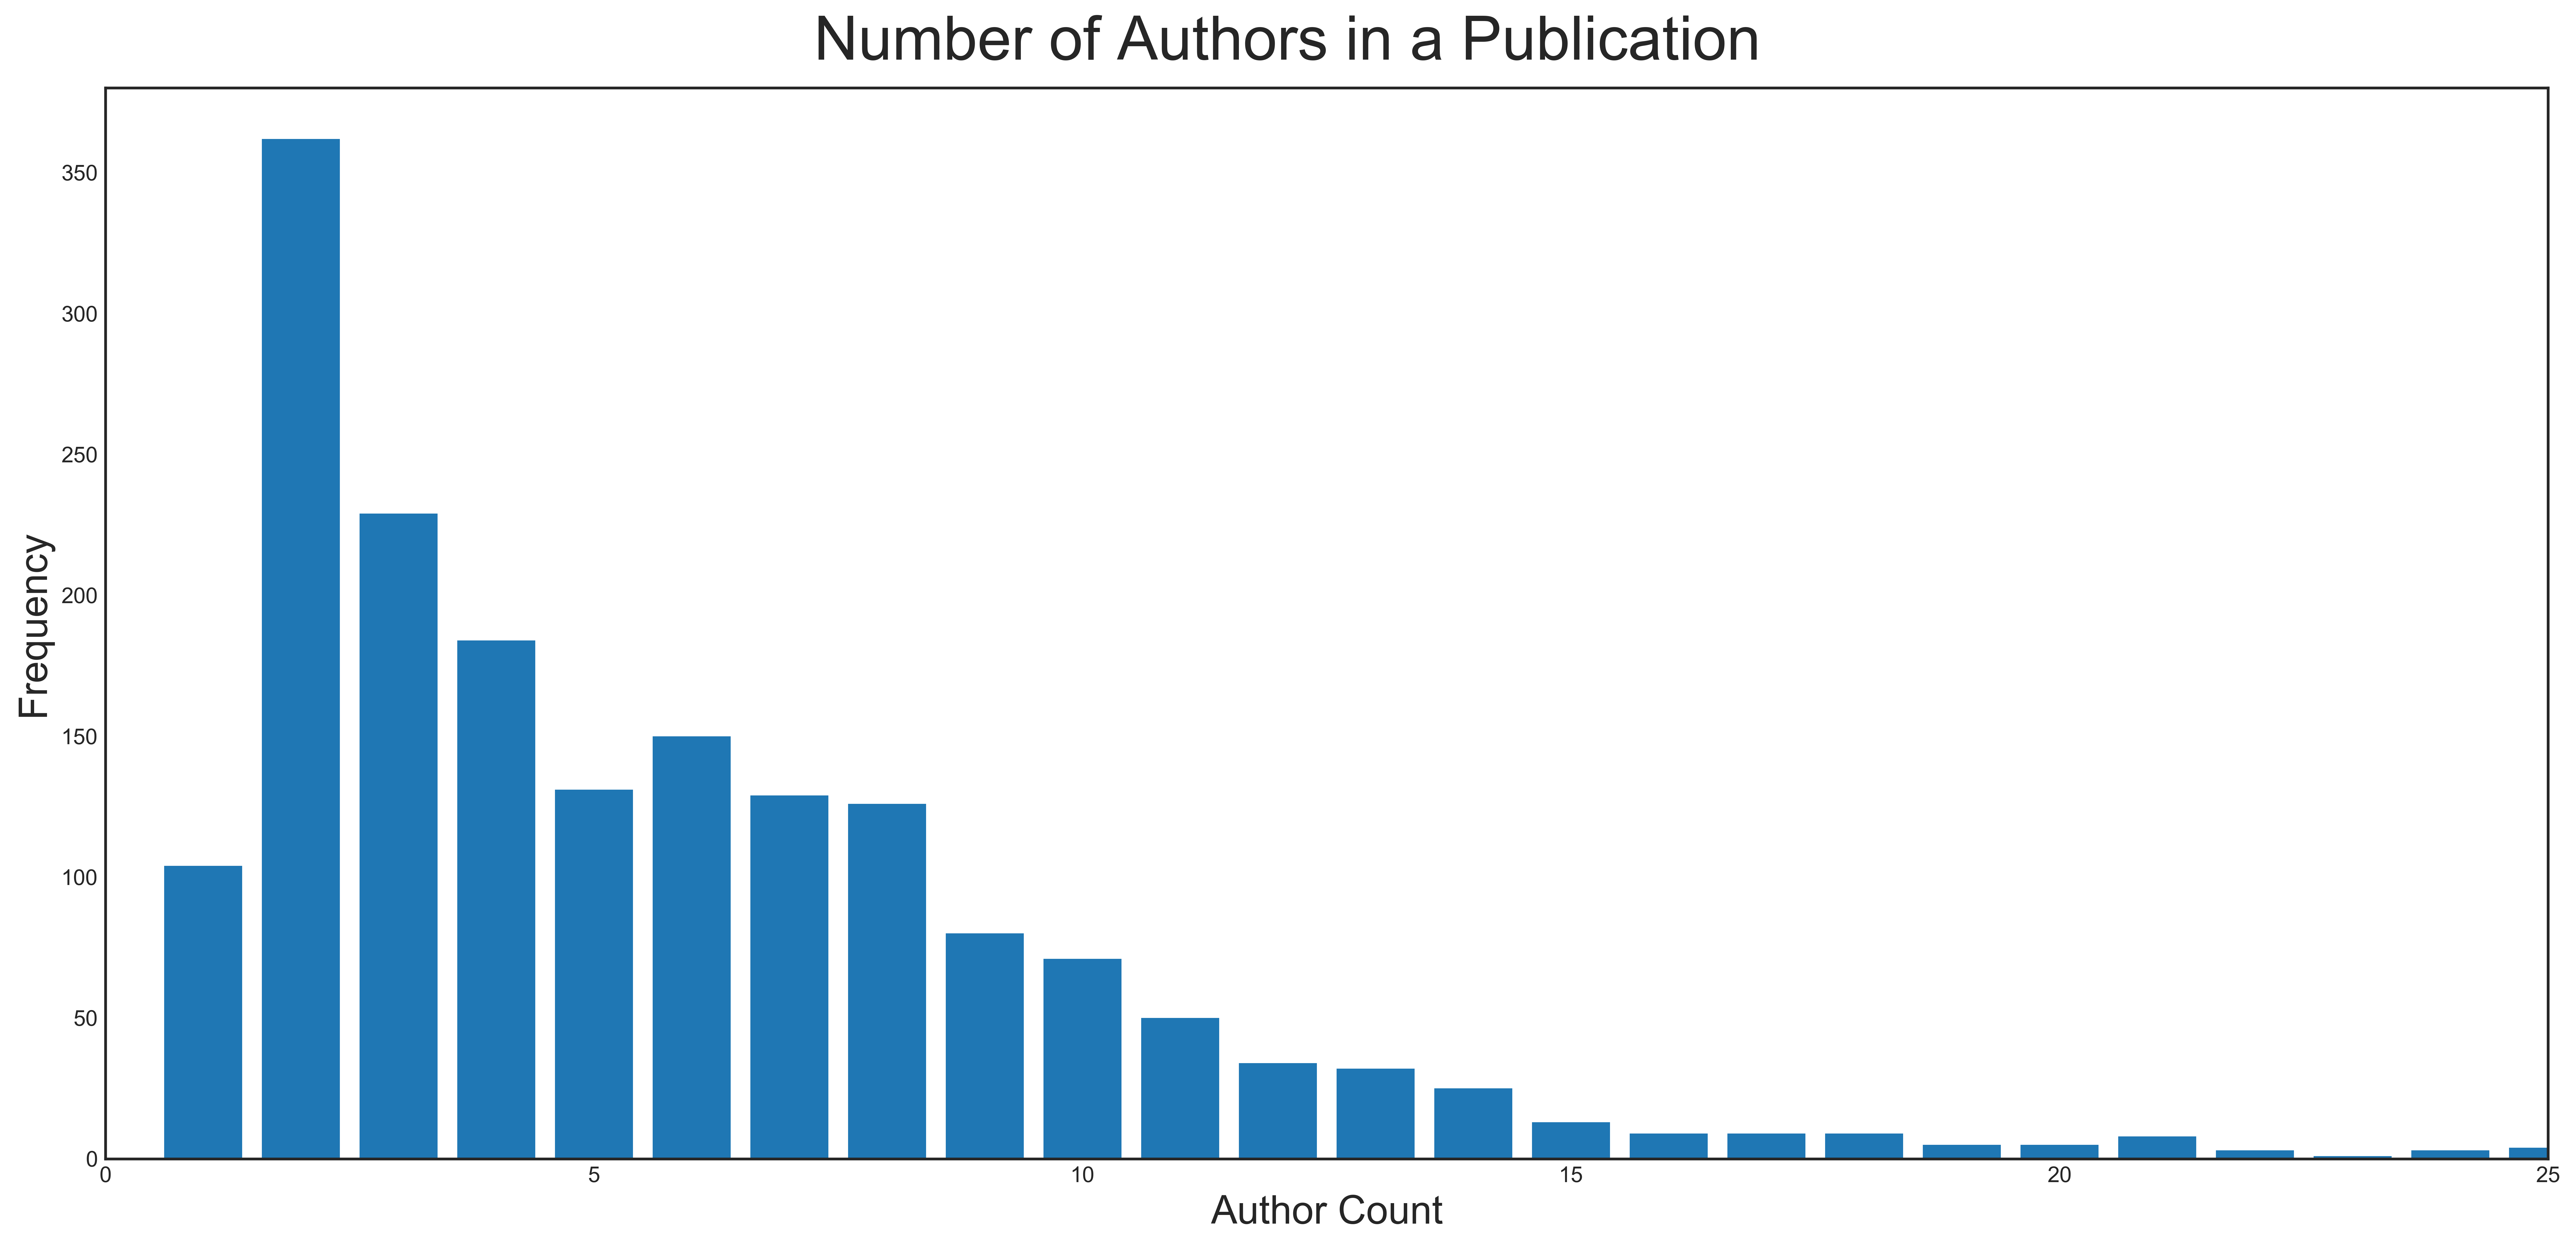

In [225]:
fig=plt.figure(figsize=(20,9), dpi= 600, facecolor='w', edgecolor='k')

num_authors = list()

for i in scopus["Authors"]:
    i = i.split(",")
    num_authors.append(len(i))

num_authors = collections.Counter(num_authors) # dictionary of value:frequency. 
plt.bar(num_authors.keys(), num_authors.values())
plt.xlim((0,25))
plt.figtext(.5,.9,'Number of Authors in a Publication', fontsize=28, ha='center')
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Author Count', fontsize=18)
# sorted(num_authors.items())

# Top Collaborators

In [ ]:
# print(scopus[["Title", "Authors with affiliations"]])
collab_list = list() # list of lists. Inner list is all Stowers authors per publication. 

# Iterate over publications. 
for i in scopus["Authors with affiliations"]:
    i = i.split(';')
    temp_collab = list()
#     print(i)
    # Iterate over authors with affiliations, check if Stowers person. 
    for auth in i:
        if 'Stowers' in auth:
            # remove affiliations and keep author names via regex.        
            auth = re.split('Stowers', auth)[0]
            auth = re.match("[^,]+,[^,]+", auth)
            auth = auth.group(0)
            temp_collab.append(auth)
        else:
            pass # non-Stowers person
        
    collab_list.append(temp_collab) # append the list of authors per publication into overall collab_list. 

# Top Contributors

In [ ]:
auth_pub = defaultdict(int)

for i in collab_list:
    for auth in i:
        auth_pub[auth] += 1

print(collections.OrderedDict(sorted(auth_pub.items(), key=lambda x: x[1])))

It seems like the frequency of papers with one author is quite high. On the contrary, this can indicate either 1) one Stowers person published by themselves, or 2) one Stowers person with group of other non-Stowers person. The latter is more likely the case, since the next section shows number of papers with one author is rare (assuming that one person is from Stowers which is reasonable given the scopus data). 